CHeck "LaRosa Machine Shop" problem, location-like problem.

Minimize sqrt((x-1)^2 + (y-2)^2) + sqrt((x-n)^2 + (y-4)^2) + ... 

Optimal answer = (2.230, 3.349)

Part A: Solve LaRosa with derivation. (answer should be (2.230, 3.349))

Part B: Solve LaRosa as binary Linear Problem: Do it by splitting the 6x6 into 36 grids, and calculating the distances for each one of the points prior to giving it to the model.
      
for example, (0.5, 0.5) = 12, (1.5, 0.5) = 10, (2.5, 0.5) = 7, etc.. , and then its a binary problem.  

Let us consider the case of LaRosa Machine Shop (LMS). LMS is studying where to locate
its tool bin facility on the shop floor. The locations of the five production stations appear in
Figure 14.9. In an attempt to be fair to the workers in each of the production stations, man-
agement has decided to try to find the position of the tool bin that would minimize the sum
of the distances from the tool bin to the five production stations. We define the following
decision variables:

X = horizontal location of the tool bin

Y = vertical location of the tool bin

### Solve with derivation

In [2]:
from sympy import Symbol
from sympy.solvers import solve
import numpy as np

Stations = ["Fabrication","Paint","Subassembly 1","Subassembly 2","Assembly"]
x_coords = [1,1,2.5,3,4]
y_coords = [4,2,2  ,5,4]

# Solve => Minimize the sum of distances
# Euclidian Distance = sqrt(a^2-b^2)
# TRIED USING EUCLIDIAN DISTANCE, BUT THE DERIVATES BECOMES TOO COMPLEX TO SOLVE.
# HENCE, I SWITCHED TO MANHATTEN DISTANCE. 
# Manhatten Distance = |a-b|
# BUT EVEN THIS DIDN'T WORK BECAUSE SYMPY DOESN'T KNOW HOW TO DERIVE abs
# HENCE, I FINALLY CREATED MY NEW VERY OWN EQUATION CALLED:
# Clidian distance = a^2-b^2
# WHICH IS JUST EUCLIDIAN DISTANCE BUT WITHOUT THE SQRT.

distance = lambda x, y: ((x[0] - y[0])**2 + (x[1] - y[1])**2)

X = Symbol('X')
Y = Symbol('Y')

value = 0
for x_coord, y_coord in zip(x_coords, y_coords):
    value += distance((X, Y), (x_coord, y_coord))


diffed_X = value.diff(X)
diffed_Y = value.diff(Y)

print(float(solve(diffed_X, X)[0]))
print(float(solve(diffed_Y, Y)[0]))

2.3
3.4


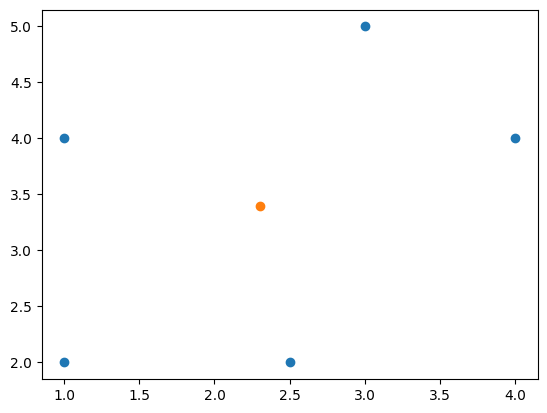

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x_coords, y_coords)
plt.scatter(float(solve(diffed_X, X)[0]), float(solve(diffed_Y, Y)[0]))

### Solve as Integer Optimization 

100%|██████████| 30/30 [00:00<00:00, 13403.19it/s]


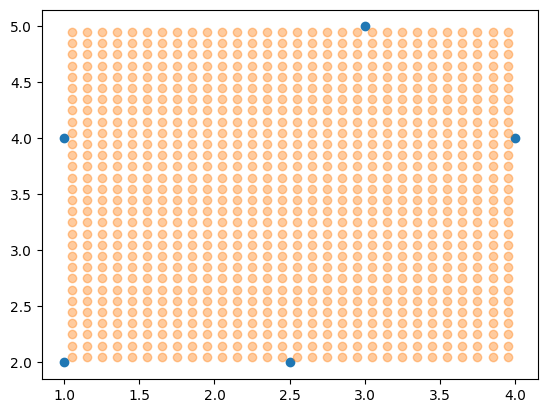

In [33]:
import numpy as np
from tqdm import tqdm 

Stations = ["Fabrication","Paint","Subassembly 1","Subassembly 2","Assembly"]
x_coords = [1,1,2.5,3,4]
y_coords = [4,2,2  ,5,4]

# WHATEVER YOU DO, DO NOT MAKE THIS LARGER THAN 1000. IT BROKE MY PC. PLEASE DONT
# ALSO, IF VALUE IS LARGER THAN 200. COMMENT THE LAST LINE IN THIS CELL.
# ALSO ALSO, IF THE VALUE IS LARGER THAN 5O. DO NOT SOLVE IT USING DOCPLEX.
expansion = 10 # Higher values mean more accurate output, but more computationally expensive
# TRIED RASING THE EXPANSION TO 500, AND GOT THE MOST CORRECT ANSWER WHICH IS:
# (2.229, 3.349) with a distance of 8.3006 units

count_x_possible = int(max(x_coords)) - int(min(x_coords))
count_y_possible = int(max(y_coords)) - int(min(y_coords))

plt.scatter(x_coords, y_coords)

possibles_places_X= []
possibles_places_Y= []
possibles_places = []

for x_indx in tqdm(range(int(count_x_possible*expansion))):
    for y_indx in range(int(count_y_possible*expansion)):

        x_possible_coord = min(x_coords) + (x_indx +  0.5) / expansion
        y_possible_coord = min(y_coords) + (y_indx +  0.5) / expansion

        possibles_places_X.append(x_possible_coord)
        possibles_places_Y.append(y_possible_coord)
        possibles_places.append((x_possible_coord, y_possible_coord))

plt.scatter(possibles_places_X, possibles_places_Y, alpha=0.4)

In [34]:
euclidian_distance = lambda x, y: ((x[0] - y[0])**2 + (x[1] - y[1])**2)**0.5
distances = []

for x_possible_coord, y_possible_coord in tqdm(possibles_places):
    point_distance = []
    for x_coord, y_coord in zip(x_coords, y_coords):
        point_distance.append(euclidian_distance((x_possible_coord, y_possible_coord),
                                                    (x_coord, y_coord)))

    distances.append(point_distance)

distances = np.array(distances)
print(len(possibles_places))

100%|██████████| 900/900 [00:00<00:00, 72540.71it/s]

900


#### Solve with NumPy

Distance: 8.300962617731178
Coords:	 (2.25, 3.35)


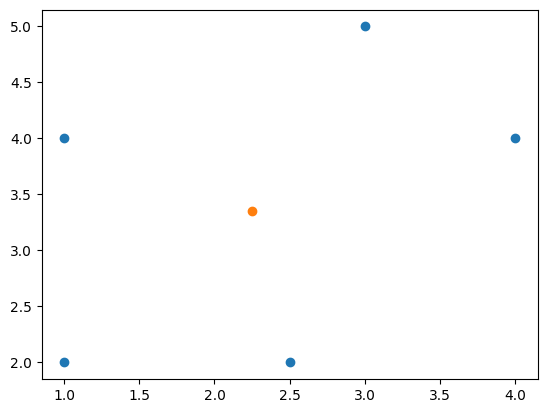

In [35]:
print('Distance:', distances[distances.sum(1).argmin()].sum())
print('Coords:\t', possibles_places[distances.sum(1).argmin()])

plt.scatter(x_coords, y_coords)
x_temp_solution, y_temp_solution = possibles_places[distances.sum(1).argmin()]
plt.scatter(x_temp_solution, y_temp_solution)

#### Solve with DoCplex

In [36]:
from docplex.mp.model import Model
from tqdm import tqdm

m = Model()

X_stations = m.binary_var_list(possibles_places)

m.add_constraint(sum(X_stations)  >= 1)

m.minimize(sum([X_stations[i]*sum(distances[i]) for i in range(len(X_stations))]))

In [37]:
solution = m.solve(log_output = True)

Version identifier: 22.1.1.0 | 2023-02-11 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
Found incumbent of value 8633.214624 after 0.00 sec. (0.04 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 1 rows and 900 columns.
All rows and columns eliminated.
Presolve time = 0.00 sec. (0.34 ticks)

Root node processing (before b&c):
  Real time             =    0.01 sec. (0.41 ticks)
Parallel b&c, 4 threads:
  Real time             =    0.00 sec. (0.00 ticks)
  Sync time (average)   =    0.00 sec.
  Wait time (average)   =    0.00 sec.
                          ------------
Total (root+branch&cut) =    0.01 sec. (0.41 ticks)


solution for: docplex_model2
objective: 8.30096
status: OPTIMAL_SOLUTION(2)
(2.25, 3.35)=1



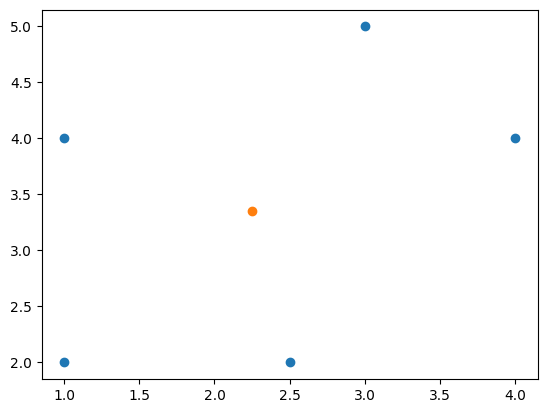

In [39]:
print(solution)
plt.scatter(x_coords, y_coords)
plt.scatter(2.25, 3.35)

### Most accurate and Fastest solution

100%|██████████| 1000/1000 [00:11<00:00, 85.44it/s]


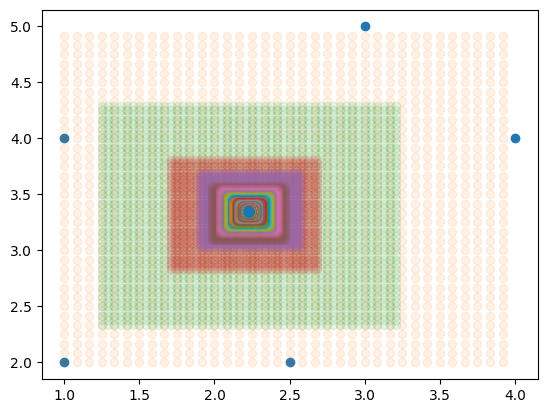

In [116]:
import numpy as np
from tqdm import tqdm 
import matplotlib.pyplot as plt

def solve_accurate(x_coords, y_coords, expansion, epochs, draw_plot =False, alpha = 0.2):

    min_pos_x, max_pos_x = min(x_coords), max(x_coords)
    min_pos_y, max_pos_y = min(y_coords), max(y_coords)

    if draw_plot:
        plt.scatter(x_coords, y_coords)

    distances_loss = []

    for epoch_num in tqdm(range(epochs)):

        possibles_places_X= []
        possibles_places_Y= []
        possibles_places = []

        for x_indx in np.arange(min_pos_x, max_pos_x, 1/(expansion*(epoch_num+1))):
            for y_indx in np.arange(min_pos_y, max_pos_y, 1/(expansion*(epoch_num+1))):

                x_possible_coord = (x_indx)
                y_possible_coord = (y_indx)

                possibles_places_X.append(x_possible_coord)
                possibles_places_Y.append(y_possible_coord)
                possibles_places.append((x_possible_coord, y_possible_coord))

        if draw_plot:
            plt.scatter(possibles_places_X, possibles_places_Y, alpha = alpha)

        euclidian_distance = lambda x, y: ((x[0] - y[0])**2 + (x[1] - y[1])**2)**0.5
        distances = []

        for x_possible_coord, y_possible_coord in possibles_places:
            point_distance = []
            for x_coord, y_coord in zip(x_coords, y_coords):
                point_distance.append(euclidian_distance((x_possible_coord, y_possible_coord),
                                                            (x_coord, y_coord)))

            distances.append(point_distance)

        distances = np.array(distances)

        x_temp_solution, y_temp_solution = possibles_places[distances.sum(1).argmin()]

        distances_loss.append(distances[distances.sum(1).argmin()].sum())

        min_pos_x = x_temp_solution-(1/(epoch_num+1))
        min_pos_y = y_temp_solution-(1/(epoch_num+1))

        max_pos_x = x_temp_solution+(1/(epoch_num+1))
        max_pos_y = y_temp_solution+(1/(epoch_num+1))


    return possibles_places[distances.sum(1).argmin()], distances_loss, 1/(expansion*(epoch_num+1))


Stations = ["Fabrication","Paint","Subassembly 1","Subassembly 2","Assembly"]
x_coords = [1,1,2.5,3,4]
y_coords = [4,2,2  ,5,4]

expansion = 12

solution_coords, loss, last_step_size = solve_accurate(x_coords, y_coords, expansion, 1000, True, 0.1)

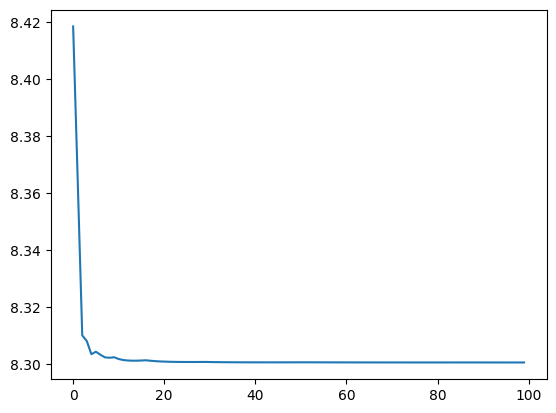

In [109]:
plt.plot(loss)

In [114]:
solution_coords

(2.2298144264502144, 3.348851200463095)

In [117]:
last_step_size

8.333333333333333e-05